In [ ]:
#|hide
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm, trange

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
jax.devices()

from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
from diffusion_curvature.comparison_space import *

%load_ext autoreload
%autoreload 2

2024-04-12 14:40:41.856230: W external/xla/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 25363087360


# Experiment Name
> Witty encapsulation

**Hypothesis**: Stuff will happen

# Machinery

In [ ]:
X, ks = torus(2000, use_guide_points=True)

In [ ]:
graphformer = partial(get_adaptive_graph, k=5, alpha=1)
G = graphformer(X)

2024-04-12 14:42:42,501:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


In [ ]:
DC = DiffusionCurvature(graph_former = graphformer)

In [ ]:
ks = DC.curvature(G, dim = 2, t = 25)

2024-04-12 14:43:19,433:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


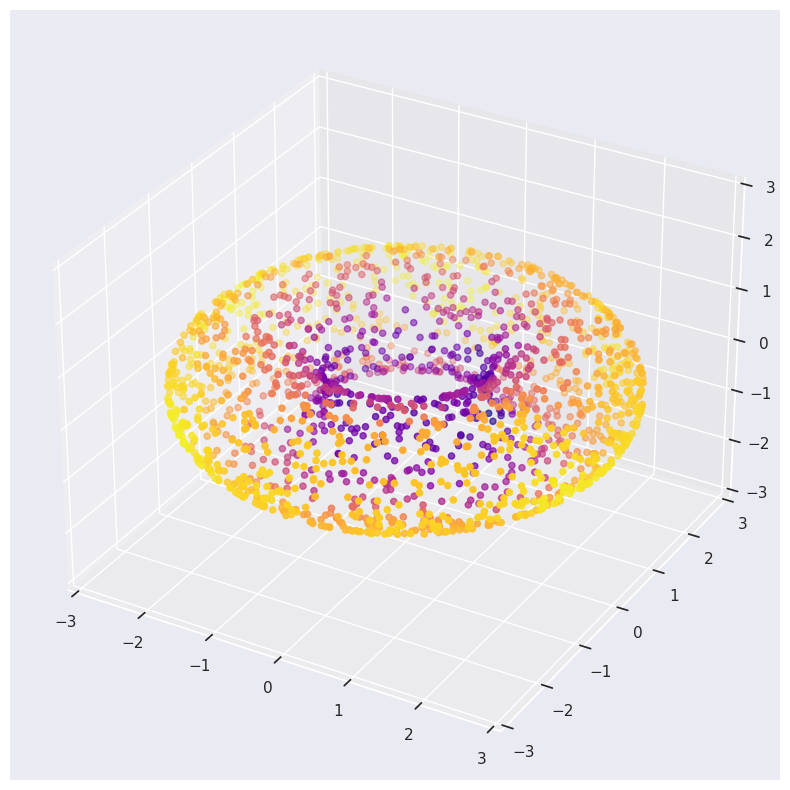

In [ ]:
plot_3d(X, ks)

In [ ]:
DC.Pt

Array([[4.1210609e-03, 5.7073623e-07, 7.9496640e-06, ..., 1.6266148e-03,
        2.2971944e-05, 5.5267994e-04],
       [2.5915898e-07, 2.2501074e-02, 4.5320936e-10, ..., 3.2507609e-07,
        3.3954514e-08, 3.4945180e-05],
       [7.7552877e-06, 9.7361452e-10, 4.7559650e-03, ..., 7.2865305e-08,
        2.9598204e-03, 6.4115826e-05],
       ...,
       [1.3951770e-03, 6.1403051e-07, 6.4062405e-08, ..., 4.6193046e-03,
        2.4952269e-07, 3.9221050e-05],
       [2.2055461e-05, 7.1801082e-08, 2.9128368e-03, ..., 2.7933191e-07,
        4.2539695e-03, 3.8356727e-04],
       [5.2181305e-04, 7.2652772e-05, 6.2056162e-05, ..., 4.3175303e-05,
        3.7720281e-04, 4.2081112e-03]], dtype=float32)

In [ ]:
def plot_torus_inside_outside_diffusion(t):
    unsigned_ks = DC.unsigned_curvature(G, t=t)
    signal1 = DC.Pt[0]
    signal2 = DC.Pt[1]
    signal = signal1 + signal2
    plot_3d(X, signal, f"Diffusion Spreading Faster in the Negatively Curved Region (t={t})")

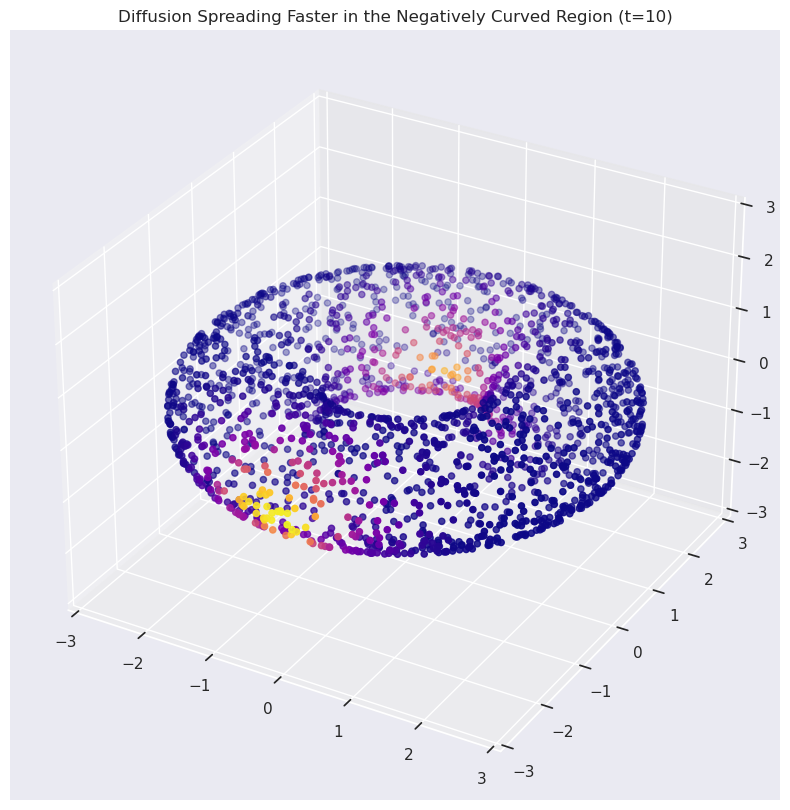

In [ ]:
plot_torus_inside_outside_diffusion(10)

# Results

# Conclusion